# Dream Market's Cocaine 

## "Existe un amazon.com oculto dirigido al mundo de las drogas ilegales" 

Esta libreta se basa en un dataset que contine algunas variables interesantes con las cuales se espera obtener un panorama general sobre como se comportan las ventas de drogas ilegales en la dark web.


# Introducción

En la actualidad las compras por internet se han convertido en algo completamente normal para las personas, hasta el punto en el que el mercado se ha convertido en el mundo entero, existen compradores para cualquier producto. Claro que como para aquellos productos que no se pueden comprar en la tiendita de la esquina existe un mercado negro, tambien existe un mercado negro de compras en internet, que va desde comprar (inserte su pensamiento mas bizarro aqui) hasta (otro aun mas bizarro aqui ). 

Dejando de lado sus pensamientos cochinos, en este documento hablaremos en concreto sobre el mundo de las drogas en internet ya que para algunas personas que no viven en México y que para su desgracia no tienen un "tiradero" en cada colonia de la ciudad abierto las 24 horas del dia, los 365 dias de la semana, existe aun una solucion.

#### Comprar drogas por internet.

Comprar drogas por internet es algo bastante serio, principalmente por que mantener el anonimato es algo imprescindible en el mundo virtual, tanto por el lado de los compradores como por el de los vendedores, asi que uno pensaria que es un poco dificil 
hacer este tipo de compras y la verdad es que si lo es, pero una vez dentro ¿Que es lo que a uno le espera? ¿cuanto podre comprar? ¿con que voy a pagar para que no me rastreen? ¿cuanto me va a costar? y un monton de pregunas mas.
Para comprender un poco mejor como funciona esto, usaremos el siguiente dataset: https://www.kaggle.com/everling/cocaine-listings que contiene informacion de aproximadamente 1400 productos, colectado mediante una tecnica de gathering llamada web-scraping, en el año 2017.







##  Datos del sitio web


In [1]:
import pandas as pd
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
import seaborn as sns; sns.set()
from IPython.display import Image
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np
import pandas
from mpl_toolkits.mplot3d import Axes3D

## Resumen de los datos que contiene el archivo "coca.csv"

In [2]:
coca_datos = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv
clustcoca = pd.read_csv('coca.csv') #cargando los datos del archivo llamado coca en formato .csv este dataset tiene solo las columnas que considero importantes para este doc.
coca_datos.head(10)

Unnamed: 0                                      product_title  \
0          10              !!!!!INTRO OFFER!!!!! 1GR COCAINE 90%   
1          11              !!!!!INTRO OFFER!!!!! 2GR COCAINE 90%   
2          14  !!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...   
3          20  !1G! C O L O M B I A N C O C A I N E - 89% PURITY   
4          41      ** 1 Gram 87% Pure Uncut Colombian Cocaine **   
5          42     ** 10 Gram 87% Pure Uncut Colombian Cocaine **   
6          43      ** 2 Gram 87% Pure Uncut Colombian Cocaine **   
7          44      ** 3 Gram 87% Pure Uncut Colombian Cocaine **   
8          45      ** 5 Gram 87% Pure Uncut Colombian Cocaine **   
9          57         ***** 0.5 gm uk to uk sociable cocaine 75%   

  ships_from_to  grams  quality  btc_price  cost_per_gram  cost_per_gram_pure  \
0      NL  → EU    1.0     90.0    0.02577       0.025770            0.028633   
1      NL  → EU    2.0     90.0    0.05150       0.025750            0.028611   
2      NL  → EU    0.5     89.0    0.01649       0.032980            0.037056   
3      FR  → EU    1.0     89.0    0.04120       0.041200            0.046292   
4      NL  → WW    1.0     87.0    0.03400       0.034000            0.039080   
5      NL  → WW   10.0     87.0    0.27050       0.027050            0.031092   
6      NL  → WW    2.0     87.0    0.06230       0.031150            0.035805   
7      NL  → WW    3.0     87.0    0.08900       0.029667            0.034100   
8      NL  → WW    5.0     87.0    0.14170       0.028340            0.032575   
9      GB  → GB    0.5     75.0    0.01173       0.023460            0.031280   

   escrow                                       product_link  ... ships_to_SE  \
0       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
1       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
2       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
3       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
4       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
5       0  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
6       0  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
7       0  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
8       0  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
9       1  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   

  ships_from_SE  ships_to_CO  ships_from_CO ships_to_CN ships_from_CN  \
0         False        False          False       False         False   
1         False        False          False       False         False   
2         False        False          False       False         False   
3         False        False          False       False         False   
4         False        False          False       False         False   
5         False        False          False       False         False   
6         False        False          False       False         False   
7         False        False          False       False         False   
8         False        False          False       False         False   
9         False        False          False       False         False   

   ships_to_PL  ships_from_PL  ships_to_GR  ships_from_GR  
0        False          False        False          False  
1        False          False        False          False  
2        False          False        False          False  
3        False          False        False          False  
4        False          False        False          False  
5        False          False        False          False  
6        False          False        False          False  
7        False          False        False          False  
8        False          False        False          False  
9        False          False        False          False  

[10 r

In [3]:
clustcoca.drop(['product_title', 'vendor_name', 'vendor_link','product_link','ships_from_to','ships_from',
               'ships_to_SE','ships_to_CO','ships_to_CN','ships_to_PL','ships_from_PL','ships_to_GR','ships_to_CH',
               'ships_from_CH','ships_to_BR','ships_from_BR','ships_to_CZ','ships_from_CZ','ships_from_SE','ships_from_CO',
               'ships_from_CN','ships_from_GR','ships_from_S. America','ships_to_S. America','ships_from_DK','ships_to_DK',
               'ships_from_IT','ships_to_IT','ships_from_SI','ships_to_SI','ships_from_WW','ships_to_WW','ships_from_BE',
               'ships_to_BE','ships_from_N. America','ships_to_N. America','ships_from_ES','ships_from_EU','ships_from_AU',
               'ships_to_AU','ships_to_ES','ships_to_EU','ships_from_DE','ships_to_DE','ships_from_CA','ships_to_CA',
               'ships_from_GB','ships_to_GB','ships_from_FR','ships_to_FR','ships_from_NL','ships_to_NL','ships_from_US',
               'ships_to_US','ships_to','Unnamed: 0'], axis=1,inplace=True)#eliminando aquellas variables con las que no puedo hacer predicción. 


In [4]:
coca_datos.columns # mostrando todas las columnas de nuestro dataset sin limpiar


Index(['Unnamed: 0', 'product_title', 'ships_from_to', 'grams', 'quality',
       'btc_price', 'cost_per_gram', 'cost_per_gram_pure', 'escrow',
       'product_link', 'vendor_link', 'vendor_name', 'successful_transactions',
       'rating', 'ships_from', 'ships_to', 'ships_to_US', 'ships_from_US',
       'ships_to_NL', 'ships_from_NL', 'ships_to_FR', 'ships_from_FR',
       'ships_to_GB', 'ships_from_GB', 'ships_to_CA', 'ships_from_CA',
       'ships_to_DE', 'ships_from_DE', 'ships_to_AU', 'ships_from_AU',
       'ships_to_EU', 'ships_from_EU', 'ships_to_ES', 'ships_from_ES',
       'ships_to_N. America', 'ships_from_N. America', 'ships_to_BE',
       'ships_from_BE', 'ships_to_WW', 'ships_from_WW', 'ships_to_SI',
       'ships_from_SI', 'ships_to_IT', 'ships_from_IT', 'ships_to_DK',
       'ships_from_DK', 'ships_to_S. America', 'ships_from_S. America',
       'ships_to_CH', 'ships_from_CH', 'ships_to_BR', 'ships_from_BR',
       'ships_to_CZ', 'ships_from_CZ', 'ships_to_SE', 'ships_f

In [5]:
clustcoca.columns # mostrando columnas restantes despues de eliminar aquellas con variables categoricas

Index(['grams', 'quality', 'btc_price', 'cost_per_gram', 'cost_per_gram_pure',
       'escrow', 'successful_transactions', 'rating'],
      dtype='object')

### Descripción de las variables 

Con el resumen de los datos podemos darnos una pequeña idea de lo que trata este conjunto de datos.

- Imaginense que son ustedes los que estan buscando comprar cocaina por internet, ¿que criterio utilizarian 
para realizar su compra?.<br>

En el dataset se pueden encontrar variables tanto categoricas como cuantitativas pero, son las cuantitativas 
las que parecen describir mejor la tendencia de los datos y por lo tanto el comportamiento de compradores de cocaina en la dark web. <br>




  
#### 'product_title'
contiene un resumen de lo que buscas (si es pura, la calidad, el costo) no en todos los casos 
#### 'ships_from_to'
(de donde viene y a donde se envia)
#### 'grams'
(la cantidad de gramos que un vendedor manda)
algunos vendedores se anuncian como "0.5G COCAINE 89% "  y otros "10 Gram 87% Pure Uncut Colombian Cocaine" como que no dejan lugar a que tu puedas comprar lo que te de la gana. 
#### 'quality'
La calidad de la cocaina que venden, como ejemplo, la denominada "Yen” es más pura (roza el 98%) y más blanca, escamosa y brillante. Ahora bien, existen otros tipos de cocaína en polvo con menos pureza, en la que su presentación es más polvorienta y con menor brillo. Esto ocurre porque para su comercialización se añaden una serie de sustancias químicas que pueden ser altamente tóxicas. Cuantas menos sustancias incorpore más pura es la coca y es considerada de mayor calidad.
#### 'btc_price'
el precio en bitcoins del producto que venden
#### 'cost_per_gram'
costo por gramo de coca no pura 
#### 'cost_per_gram_pure'
costo por gramo de coca pura
#### 'product_link'
el enlace hacia el producto
#### 'vendor_link'
enlace del vendedor 
#### 'vendor_name'
nombre del vendedor
#### 'successful_transactions'
numero de transacciones exitosas
#### 'rating'
rating del vendedor 


    

## Primera observación

Con solo leer las etiquetas del dataset es facil hacerse una idea, mejor dicho muchas ideas del comportamiento de los datos.<br>
Como ejemplo yo podria crear una hipotesis que se base directamente en la calidad de la cocaina, es decir que la calidad desde mi punto de vista deberia estar relacionada con diferentes variables de la siguiente forma:

- mayor calidad implica mayor precio
- mayor calidad implica correlación con la variable cost_per_gram
- mayor calidad implica correlación con la variable cost_per_gram_pure
- mayor calidad implica correlación con la variable rating 

El objetivo es utilizar las tecnicas de visualizacion de datos, no necesariamente para respaldar nuestra hipotesis (al menos no tan rapido), la idea es crear una hipotesis basados directamente en la informacion de nuestro dataset y no en nuestro criterio de organización o forma de pensar que muchas veces termina sesgando los datos a nuestra conveniencia.







## La forma de los datos

Es importante ver la distribución de los datos para darnos una idea de los problemas que nos pueden dar si no son tratados correctamente, conocer su comportamiento siempre es algo que beneficia bastante.

In [264]:
#g = sns.catplot(x="ships_from", y="cost_per_gram",data=coca_datos, kind="box")
#g.fig.set_size_inches(18,9)

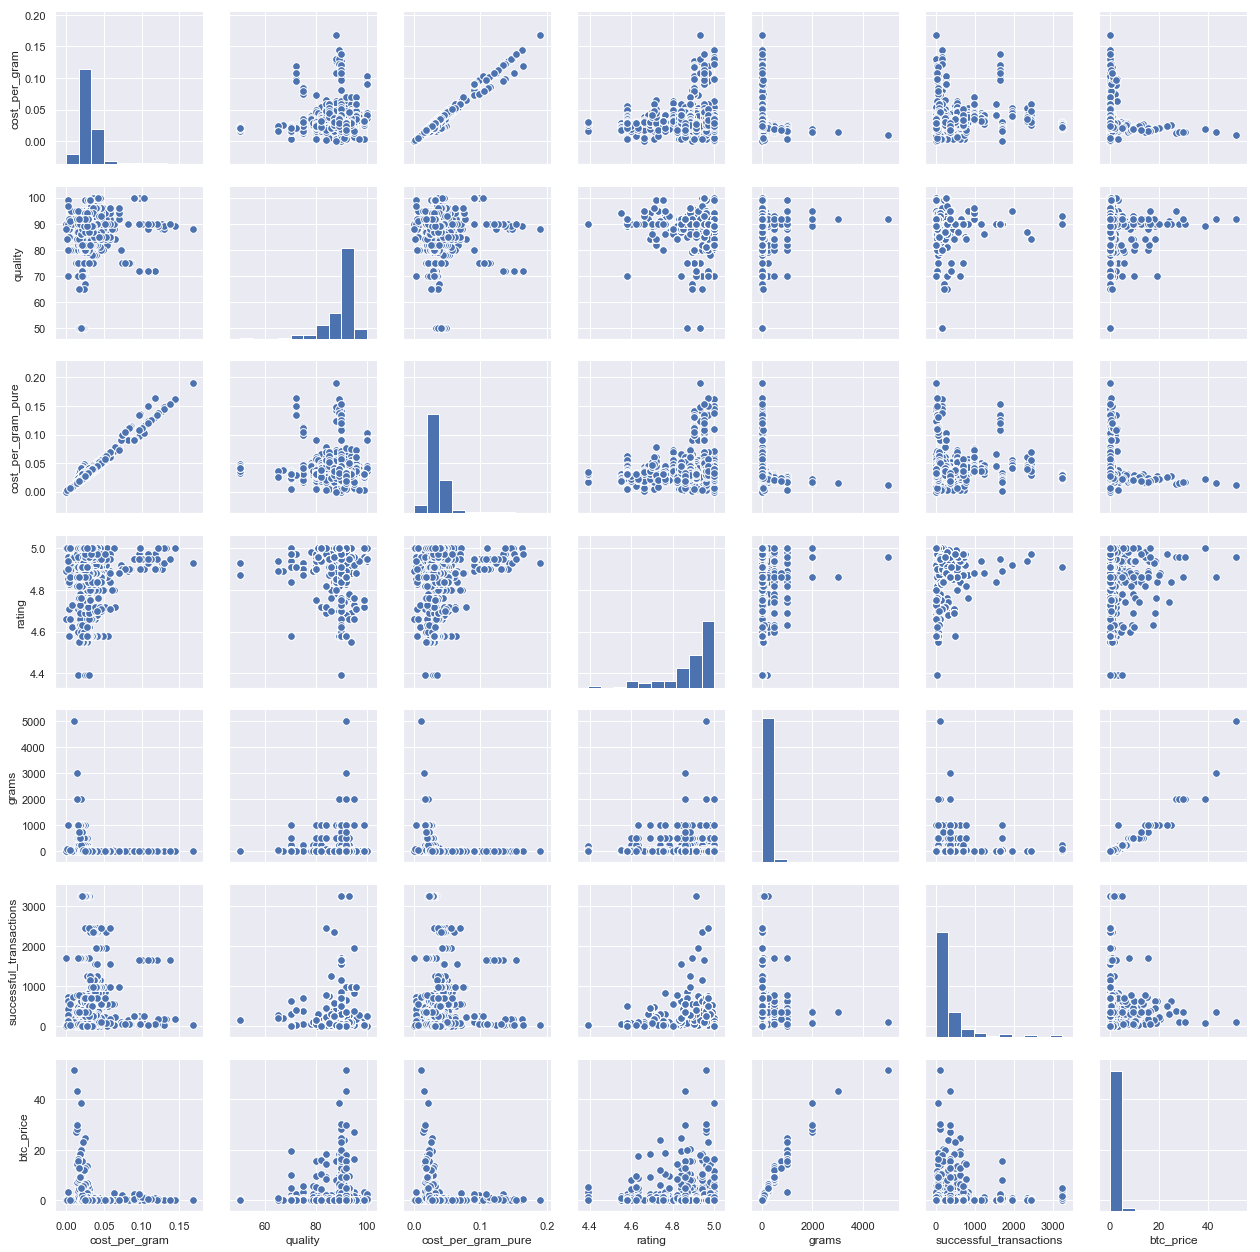

In [6]:
g = sns.PairGrid(clustcoca, vars=["cost_per_gram", "quality","cost_per_gram_pure", "rating","grams","successful_transactions","btc_price"])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=60)


In [7]:
clustcoca.corr()

grams   quality  btc_price  cost_per_gram  \
grams                    1.000000  0.030695   0.960451      -0.178628   
quality                  0.030695  1.000000   0.027096       0.082540   
btc_price                0.960451  0.027096   1.000000      -0.171318   
cost_per_gram           -0.178628  0.082540  -0.171318       1.000000   
cost_per_gram_pure      -0.178273 -0.064907  -0.170636       0.985784   
escrow                  -0.148276  0.031008  -0.159067      -0.170052   
successful_transactions -0.012006  0.053754  -0.008213       0.063822   
rating                   0.009282 -0.055191   0.000539       0.121977   

                         cost_per_gram_pure    escrow  \
grams                             -0.178273 -0.148276   
quality                           -0.064907  0.031008   
btc_price                         -0.170636 -0.159067   
cost_per_gram                      0.985784 -0.170052   
cost_per_gram_pure                 1.000000 -0.170629   
escrow                            -0.170629  1.000000   
successful_transactions            0.051564 -0.029527   
rating                             0.126917 -0.037400   

                         successful_transactions    rating  
grams                                  -0.012006  0.009282  
quality                                 0.053754 -0.055191  
btc_price                              -0.008213  0.000539  
cost_per_gram                           0.063822  0.121977  
cost_per_gram_pure                      0.051564  0.126917  
escrow                                 -0.029527 -0.037400  
successful_transactions                 1.000000  0.062433  
rating                                  0.062433  1.000000

## Comportamiento de los datos

De la grafica de distribuciónes de nuestros datos y la tabla de correlaciónes, podriamos crear hipotesis mas realistas
y respaldadas directamente con la información del dataset.

- Calidad <br>
como se habia planteado en la primera observación se decia que la calidad mantenia una relacion estrecha con todas las demas
variables, pero no ha resultado como se pensaba. Por relacion estrecha mas que nada me referia a una correlacion positiva ya que uno espera que por ejemplo entre mayor calidad el rating sea mas alto. Claro que tienen una relacion entre ellas pero no es una relacion lineal como esperaba, puede ser una relacion cuadratica, logaritmica o quien sabe de que tipo, ya que nuestros datos se ven afectados por otras variables y en dos dimensiones solo podemos ver una pequeña idea de la relacion entre ellas. 


## Factores que influyen en el precio de la cocaina 


### Anomalías 
como podemos observar en el diagrama de correlacion e histogramas existen datos que a simple vista parecer bastante raros como es el caso de la variable "btc_price" y la variable "grams" que se encuentran correlacionados de forma positiva y se aprecia cierta relacion podria decirse lineal entre ellas. 






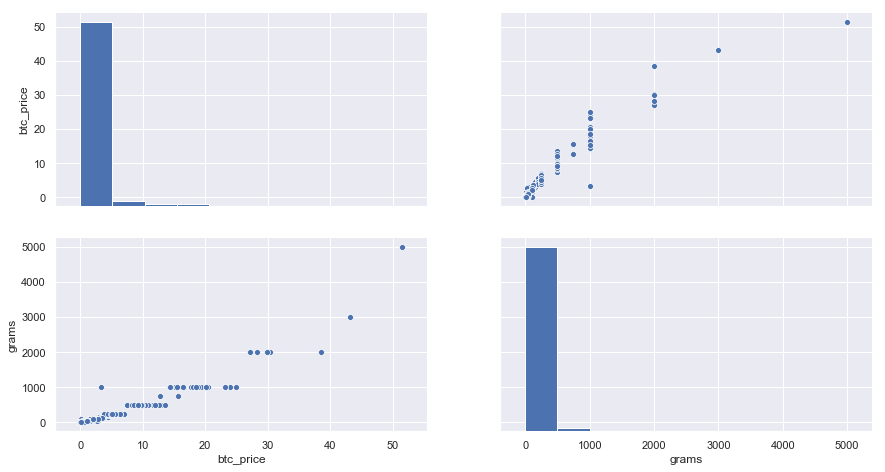

In [9]:
g=sns.pairplot(clustcoca, vars=["btc_price", "grams"])
g.fig.set_size_inches(14,7)


In [16]:
st=coca_datos["btc_price"].std() # cantidad que mas se
pr=coca_datos["btc_price"].mean() # cantidad que mas se
print ("promedio: ",pr)
print ("Desviacion estandar: ",st)

promedio:  1.1475449619355038
Desviacion estandar:  3.663561587419021


### variable btc_price

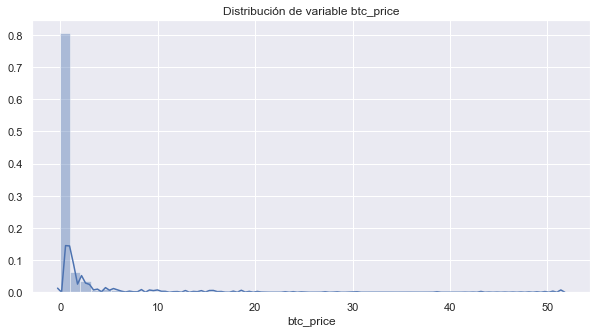

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Distribución de variable btc_price')
sns.distplot (coca_datos['btc_price'])


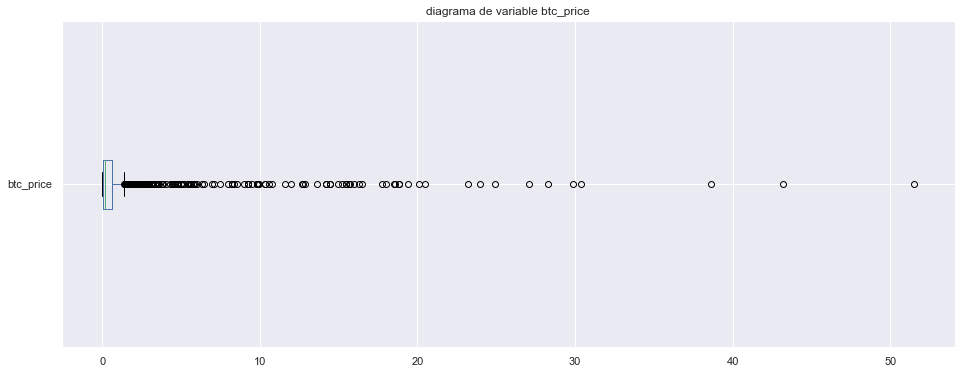

In [18]:

plt.figure(figsize=(16, 6))
plt.title('diagrama de variable btc_price')
coca_datos.boxplot(column=['btc_price'], grid = True,vert=False)


In [19]:
coca_datos.nlargest(100, ['btc_price']) 


Unnamed: 0                                      product_title  \
1033        2841                           5KG Bolivian Cocaine 92%   
1499        4607                       ✯3kg FLAKES COCAINE 92% ✯GA✯   
1215        3407        COCAINE - 2 KILOGRAM - COLOMBIAN - 89% PURE   
745         2026                          2KG Colombian Cocaine 90%   
1498        4606                       ✯2kg FLAKES COCAINE 92% ✯GA✯   
744         2025                           2KG Bolivian Cocaine 90%   
541         1529            2 KG BRICK COCAINE 95% SHIPPED FROM USA   
466         1311                   1KG  Pure Uncut Cocaine  90%-92%   
465         1310  1KG  PURE COCAINE 89-91%    ******LIMITED TIME DI   
469         1314      1KG COCAINE (Peru)AAA+++ 90% Flakes Fishscale   
175          543     1 KG COCAINE FISHSCALE PURE FLAKE 90% ***PROMO   
473         1318                             1KG COCAINE FLAKES 90%   
464         1309                1KG  Great Quality Cocaine  70%-75%   
176          548    1 KG Top quality Cocaine  from PERU, 91% purity   
472         1317          1KG COCAINE 90% - Straight From The BRICK   
476         1324                                   1KG- COCAINE 84%   
470         1315         1KG COCAINE 89% - STRAIGHT FROM THE BRICK-   
475         1320                          1KG Columbian Cocaine 92%   
471         1316                                    1KG COCAINE 90%   
1375        4252             ★ 1 Kilo Colombian Cocaine UNCUT 90% ★   
1304        3713  FULL BRICK (1KG) BRICK COCAINE 95% SHIPPED FRO...   
249          758  1000GRAMS (1KG) - Peruvian Cocaine - 82% LAB T...   
246          750  1000 (1KG) Gram First Class Colombian Cocaine ...   
1084        3023  750 GRAM COCAINE FISHSCALE PURE FLAKE 90% ***P...   
247          754        1000G Crystal Cocaine 88% Colombian Quality   
248          757  1000GRAMS (1KG) - Colombian Cocaine - 80% LAB ...   
1495        4603                       ✯1kg FLAKES COCAINE 92% ✯GA✯   
467         1312            1KG 90%+ Pure Uncut Colombian Flakes!!!   
177          549  1 Kilo Brick Cocain 90%+ Pure Flakes Uncut Col...   
1261        3548                       Cocaine 84%+ , 1000 Grams FE   
...          ...                                                ...   
645         1766       250G Cocain 90%+ Pure Flakes Uncut Colombian   
644         1765            250G COCAINE PERUVIAN UNCUT LABTEST 90%   
1387        4315             ★ 250 GR Colombian Cocaine UNCUT 90% ★   
636         1748  250 GR Top quality Cocaine  from PERU, 91% purity   
637         1749  250 GRAM COCAINE FISHSCALE PURE FLAKE 90% ***P...   
655         1788      250gr High Quality Uncut Cocaine 90% Fishcale   
647         1770       250GRAM - Colombian Cocaine - 80% LAB TESTED   
584         1641          200 GR PREMIUM QUALITY COCAINE - PERU 90%   
635         1744    250 GR Cocaine 93% Pure  for 9760 Euro   ESCROW   
1496        4604                      ✯250g FLAKES COCAINE 92% ✯GA✯   
653         1785              250gr  Great Quality Cocaine  70%-75%   
639         1751    250 GRAMS COLOMBIAN COCAINE 93% + FREE SHIPPING   
641         1757                     250 gram Columbian Cocaine 92%   
646         1768                                  250GR COCAINE 90%   
587         1647                            200G COCAINE FLAKES 90%   
648         1771        250GRAM - Peruvian Cocaine - 82% LAB TESTED   
586         1646        200G COCAINE 89% - STRAIGHT FROM THE BRICK-   
408         1168             150G COCAINE (Peru) A+++ 90% Fishscale   
652         1782  250g Pure uncut colombian crystal cocaine! 90% AA   
640         1756    250 Grams of Colombian Fishscale Cocaine 85-90%   
649         1772    250g  92% peruvian uncut cocaine free shipping!   
583         1640    200 GR Cocaine 93% Pure  for 7900 Euro   ESCROW   
650         1773    250g - AH Special Snow White Cocaine - 90% Pure   
588         1648                200G Colombian Fishcale Cocaine 92%   
589         1650              

In [24]:
bt=coca_datos["btc_price"].mode() # precio mas comun
gr=coca_datos["grams"].mode()
print ("moda de variable btc_price: ",bt)
print ("moda de variable grams: " ,gr)

moda de variable btc_price:  0    0.0309
dtype: float64
moda de variable grams:  0    1.0
dtype: float64


In [21]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print (coca_datos['grams'].value_counts())
  


1.00       196
5.00       152
2.00       116
10.00      106
0.50        88
7.00        79
50.00       69
3.50        68
14.00       66
28.00       62
3.00        58
100.00      58
25.00       49
20.00       49
500.00      27
250.00      26
1000.00     26
4.00        24
15.00       20
2.50        17
56.00       14
0.20        13
0.25        12
1.50        11
200.00       7
30.00        7
150.00       6
8.00         5
7.50         5
6.00         5
0.30         5
2000.00      5
0.10         4
125.00       4
9.00         4
40.00        3
35.00        3
112.00       3
75.00        3
12.00        2
45.00        2
4.50         2
750.00       2
0.12         2
18.00        1
3000.00      1
0.60         1
0.35         1
5000.00      1
0.45         1
1.20         1
55.00        1
0.75         1
120.00       1
126.00       1
84.00        1
80.00        1
70.00        1
36.00        1
10.50        1
24.00        1
21.00        1
0.40         1
Name: grams, dtype: int64


### Explicación de variable btc_price y grams

como podemos observar en la distribución de la variables y principalmente en el diagrama de caja de btc_price tenemos bastantes valores atipicos originados principalmente por cantidades de cocaina fuera de lo "normal" que se venden en el sitio. <br>
Se puede observar la cantidad que mas se vende es 1 gramo pero ya no estamos hablando de gramos, todos esos valores atipicos pertenecen a personas que han decidido vender kilos, Como se puede apreciar en el resumen, el maximo que se publica es 5 kg (variable grams) y ya que los gramos y el btc_price estan correlacionados, el precio se dispara a 51.5 btc.

  


### Eliminando valores atipicos 

In [336]:
dropcoca = coca_datos[ coca_datos['grams'] >= 7.0 ].index
coca_datos.drop(dropcoca , inplace=True)



In [340]:
dropcoca2 = clustcoca[ clustcoca['grams'] >= 7.0 ].index
clustcoca.drop(dropcoca2 , inplace=True)

In [29]:
coca_datos.nlargest(5, ['grams']) 


Unnamed: 0                                      product_title  \
1061        2923  6 GRAM COCAINE FISHSCALE PURE FLAKE 90% ***PROMOT   
1062        2938                        6g Cocaine Pure Flakes 90%+   
1063        2943         6gr | Cocaine 88% Pure | PROMO SAMPLE SALE   
1428        4498                  ★SALE★ 6G COCAINE AAA+ 90% Flakes   
1462        4566                ♣INTRO♣ 6G COCAINE Flakes Uncut 90%   

     ships_from_to  grams  quality  btc_price  cost_per_gram  \
1061      NL  → EU    6.0     90.0     0.1546       0.025767   
1062  FR  → FR, EU    6.0     90.0     0.2550       0.042500   
1063  NL  → WW, EU    6.0     88.0     0.1340       0.022333   
1428  DE  → WW, DE    6.0     90.0     0.2060       0.034333   
1462      DE  → WW    6.0     90.0     0.1958       0.032633   

      cost_per_gram_pure  escrow  \
1061            0.028630       1   
1062            0.047222       0   
1063            0.025379       1   
1428            0.038148       1   
1462            0.036259       1   

                                           product_link  ... ships_to_SE  \
1061  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
1062  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
1063  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
1428  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   
1462  http://lchudifyeqm4ldjj.onion/viewProduct?offe...  ...       False   

     ships_from_SE  ships_to_CO  ships_from_CO ships_to_CN ships_from_CN  \
1061         False        False          False       False         False   
1062         False        False          False       False         False   
1063         False        False          False       False         False   
1428         False        False          False       False         False   
1462         False        False          False       False         False   

      ships_to_PL  ships_from_PL  ships_to_GR  ships_from_GR  
1061        False          False        False          False  
1062        False          False        False          False  
1063        False          False        False          False  
1428        False          False        False          False  
1462        False          False        False          False  

[5 rows x 64 columns]

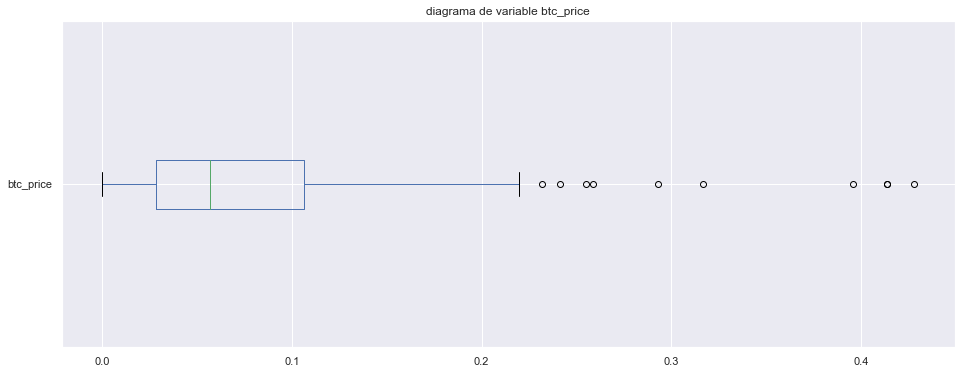

In [30]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable btc_price')
coca_datos.boxplot(column=['btc_price'], grid = True,vert=False)

### Nueva distribución de las variables

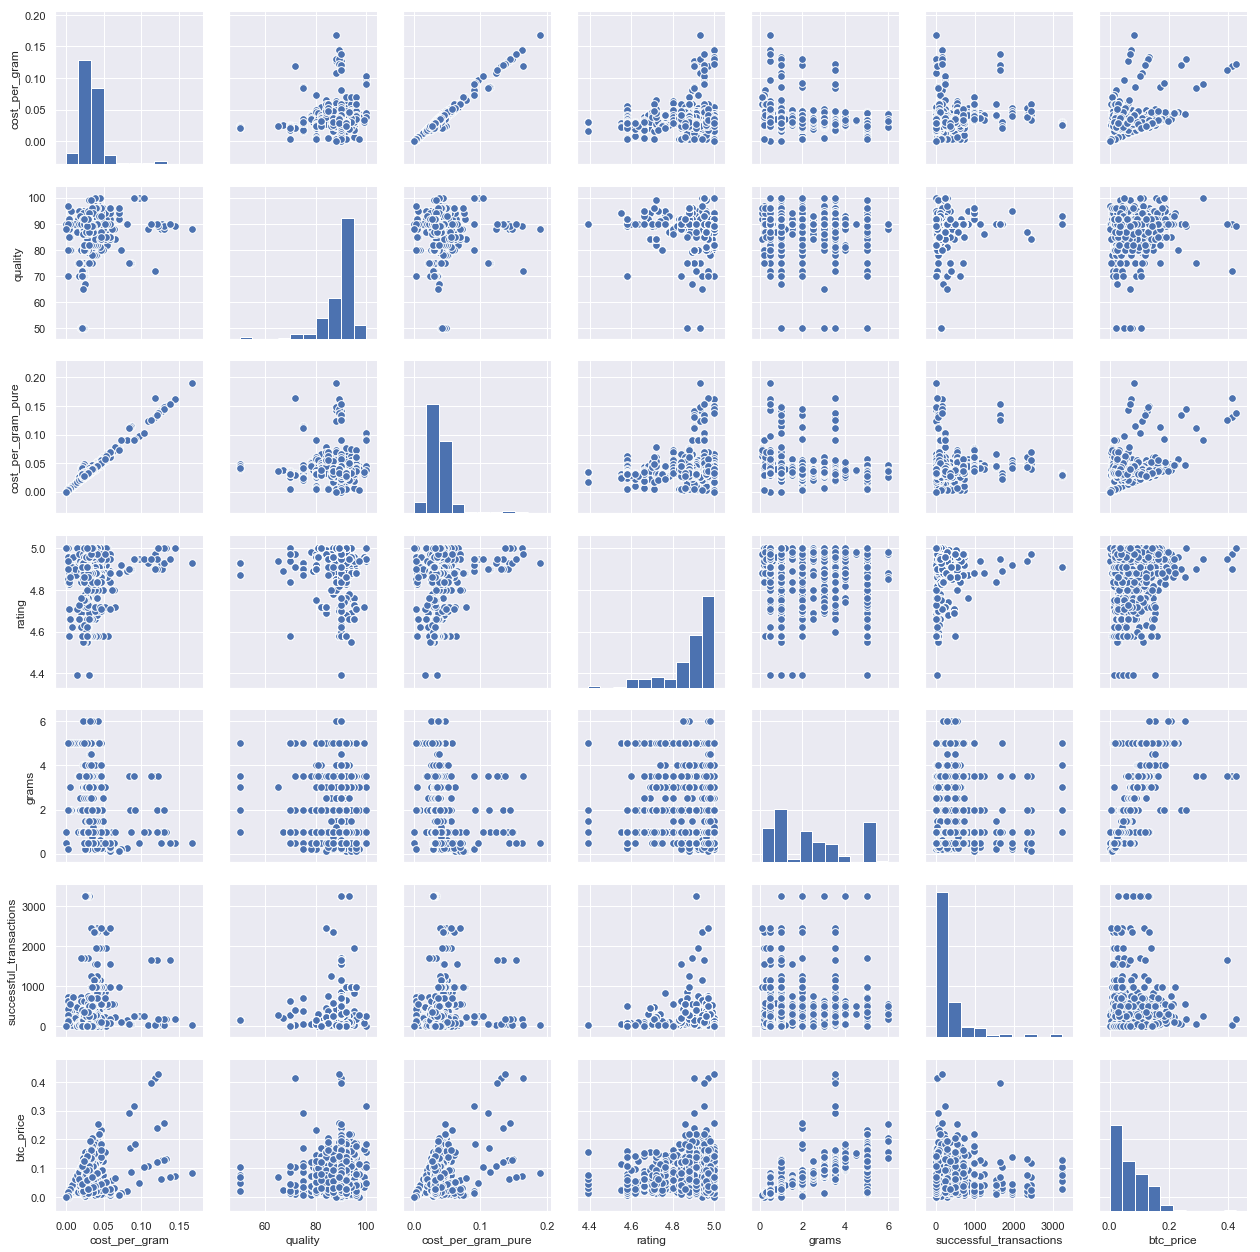

In [31]:
g = sns.PairGrid(coca_datos, vars=["cost_per_gram", "quality","cost_per_gram_pure", "rating","grams","successful_transactions","btc_price"])
g = g.map_diag(plt.hist, edgecolor="w")
g = g.map_offdiag(plt.scatter, edgecolor="w", s=60)

skewness grams = 0.4718668970701186
kurtosis grams = -1.197052087201107


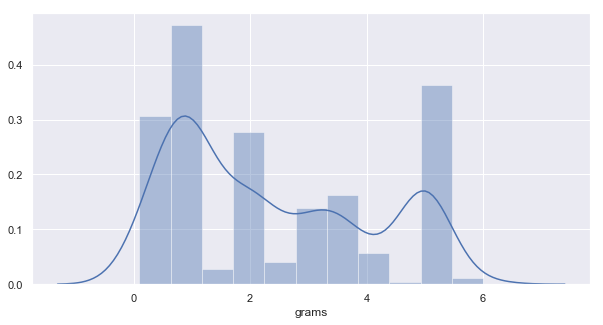

In [65]:
#### forma de las variables
plt.figure(figsize=(10, 5))
sns.distplot (coca_datos['grams'])
scpg=coca_datos['grams'].skew()
kcpg=coca_datos['grams'].kurt()
print ("skewness grams =",scpg)
print ("kurtosis grams =",kcpg)


In [20]:
import plotly.express as px

fig = px.scatter_3d(coca_datos, x='grams', y='btc_price', z='grams',
              color='grams', size='grams', size_max=18,
              symbol='grams', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

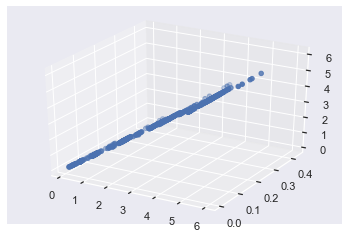

In [357]:
fig = plt.figure()


ax= fig.add_subplot (111, projection="3d")

ax.scatter (xs=clustcoca["grams"],ys=clustcoca["btc_price"],zs=clustcoca["grams"])


In [141]:
import plotly.express as px

fig = px.scatter_3d(coca_datos, x='cost_per_gram', y='cost_per_gram_pure', z='cost_per_gram',
              color='cost_per_gram', size='cost_per_gram', size_max=18,
              symbol='cost_per_gram', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

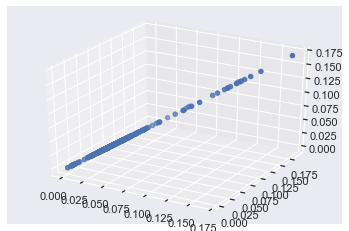

In [352]:
fig = plt.figure()
ax= fig.add_subplot (111, projection="3d")
ax.scatter (xs=clustcoca["cost_per_gram"],ys=clustcoca["cost_per_gram_pure"],zs=clustcoca["cost_per_gram"])

skewness cost_per_Gram = 3.0378806107938217
kurtosis cost_per_Gram = 14.677175714310835


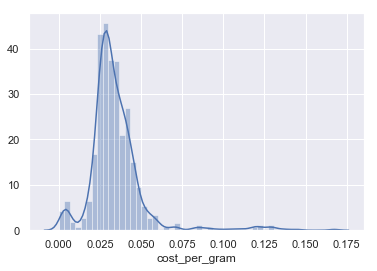

In [32]:
#### forma de las variables

sns.distplot (coca_datos['cost_per_gram'])
scpg=coca_datos['cost_per_gram'].skew()
kcpg=coca_datos['cost_per_gram'].kurt()
print ("skewness cost_per_Gram =",scpg)
print ("kurtosis cost_per_Gram =",kcpg)


skewness cost_per_gram_pure = 3.1569696878762796
kurtosis cost_per_gram_pure = 15.566892525106901


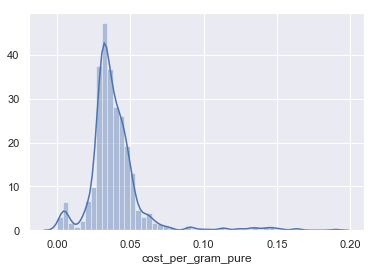

In [33]:

sns.distplot (coca_datos['cost_per_gram_pure'])
scpg=coca_datos['cost_per_gram_pure'].skew()
kcpg=coca_datos['cost_per_gram_pure'].kurt()
print ("skewness cost_per_gram_pure =",scpg)
print ("kurtosis cost_per_gram_pure =",kcpg)

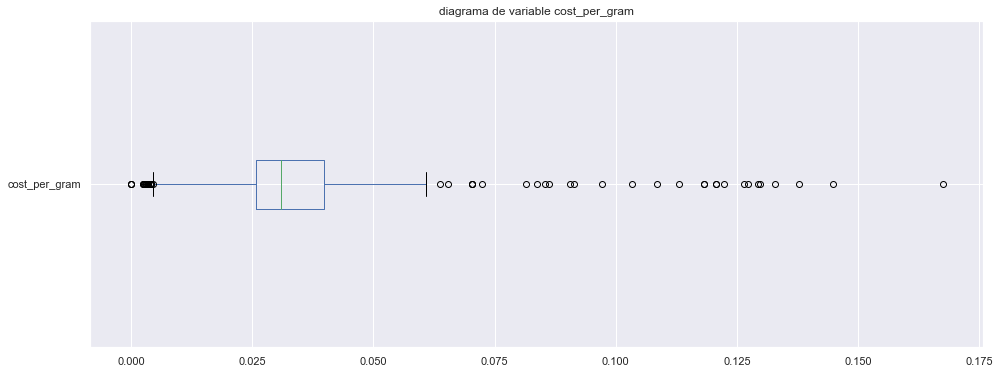

In [40]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable cost_per_gram')
coca_datos.boxplot(column=['cost_per_gram'], grid = True,vert=False)

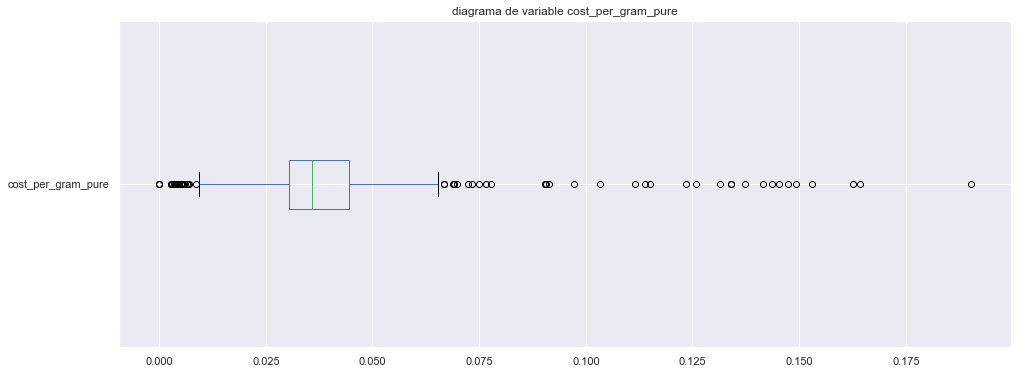

In [41]:
plt.figure(figsize=(16, 6))
plt.title('diagrama de variable cost_per_gram_pure')
coca_datos.boxplot(column=['cost_per_gram_pure'], grid = True,vert=False)

In [66]:
coca_datos

Unnamed: 0                                      product_title  \
0             10              !!!!!INTRO OFFER!!!!! 1GR COCAINE 90%   
1             11              !!!!!INTRO OFFER!!!!! 2GR COCAINE 90%   
2             14  !!!INTRO!!! 0.5G COCAINE 89% - STRAIGHT FROM T...   
3             20  !1G! C O L O M B I A N C O C A I N E - 89% PURITY   
4             41      ** 1 Gram 87% Pure Uncut Colombian Cocaine **   
6             43      ** 2 Gram 87% Pure Uncut Colombian Cocaine **   
7             44      ** 3 Gram 87% Pure Uncut Colombian Cocaine **   
8             45      ** 5 Gram 87% Pure Uncut Colombian Cocaine **   
9             57         ***** 0.5 gm uk to uk sociable cocaine 75%   
10            58      ***** 1 gm uk to uk sociable cocaine 75% pure   
12            60       ***** 1gram uk to uk pure perivian flake 95%   
13            61      ***** 2 gm uk to uk sociable cocaine 75% pure   
15            63       ***** 2gram uk to uk pure perivian flake 95%   
16            64    ***** 3.5 gm uk to uk sociable cocaine 75% pure   
17            65    ***** 3.5 gram uk to uk pure perivian flake 95%   
18            66      ***** 5 gm uk to uk sociable cocaine 75% pure   
20            68    ***** FREEBIE 0.2 gm uk to uk sociable 75% pure   
25            75                    ***Best Cocaine*** UNCUT 90% 1g   
27            77                    ***Best Cocaine*** UNCUT 90% 5g   
29            93          **JULY 2017** 1G of MK1 (50%) *Columbiana   
31            99        **JULY 2017** 3.5G of MK1 (50%) *Columbiana   
34           117   *Cocaine KTM Stamp 94% pure * 1gr  for 40,00 EUR   
35           118   *Cocaine KTM Stamp 94% pure * 2gr  for 80,00 EUR   
36           119   *Cocaine KTM Stamp 94% pure * 3.5gr  for 140 EUR   
37           120     *Cocaine KTM Stamp 94% pure * 5gr  for 195 EUR   
39           146             +++0,5gr Kokain 85% Fishscale Uncut+++   
42           149               +++1gr Kokain 85% Fishscale Uncut+++   
43           150       +++1gr Kokain 85% Fishscale Uncut+++  !!FE!!   
46           153               +++2gr Kokain 85% Fishscale Uncut+++   
47           154        +++2gr Kokain 85% Fishscale Uncut+++ !!FE!!   
...          ...                                                ...   
1453        4557                ♣INTRO♣ 2G COCAINE Flakes Uncut 90%   
1454        4558              ♣INTRO♣ 3.5G COCAINE Flakes Uncut 90%   
1456        4560                ♣INTRO♣ 3G COCAINE Flakes Uncut 90%   
1457        4561              ♣INTRO♣ 4.5G COCAINE Flakes Uncut 90%   
1458        4562                ♣INTRO♣ 4G COCAINE Flakes Uncut 90%   
1461        4565                ♣INTRO♣ 5G COCAINE Flakes Uncut 90%   
1462        4566                ♣INTRO♣ 6G COCAINE Flakes Uncut 90%   
1466        4570         ♥0.5 gram Presidential Quality Cocaine 87%   
1467        4571           ♥1 gram Presidential Quality Cocaine 87%   
1468        4572          ♥2 grams Presidential Quality Cocaine 87%   
1469        4573        ♥3.5 grams Presidential Quality Cocaine 87%   
1470        4574          ♥5 grams Presidential Quality Cocaine 87%   
1472        4576         ♥Order 1 gram Coke 87%  get 1.3g! Limited!   
1473        4577           ✘0.5g PURE BUSINESS COKE (90%, Colombia)   
1475        4579             ✘1g PURE BUSINESS COKE (90%, Colombia)   
1476        4580             ✘2g PURE BUSINESS COKE (90%, Colombia)   
1477        4581             ✘5g PURE BUSINESS COKE (90%, Colombia)   
1478        4582                ✪ 0.5G GREAT SOCIABLE COCAINE 70% ✪   
1479        4584                    ✪ 0.5G PURE&UNCUT COCAINE 92% ✪   
1481        4586                  ✪ 1G GREAT SOCIABLE COCAINE 70% ✪   
1482        4588                      ✪ 1G PURE&UNCUT COCAINE 92% ✪   
1483        4589                         ✪ 1gr - Cocaine Pure 89% ✪   
1485        4591                  ✪ 2G GREAT SOCIABLE COCAINE 70% ✪   
1486        4593                      ✪ 2G PURE&UNCUT COCAINE 92% ✪   
1487        4594              

In [14]:
#cout2.boxplot( grid = False,vert=False)
#dropcoca = coca_datos[ coca_datos['cost_per_gram'] <= .06 ].index
#coca_datos.drop(dropcoca , inplace=True)
#coca_datos

In [15]:
#dropcoca = coca_datos[ coca_datos['cost_per_gram'] <= .01 ].index
#coca_datos.drop(dropcoca , inplace=True)
#coca_datos

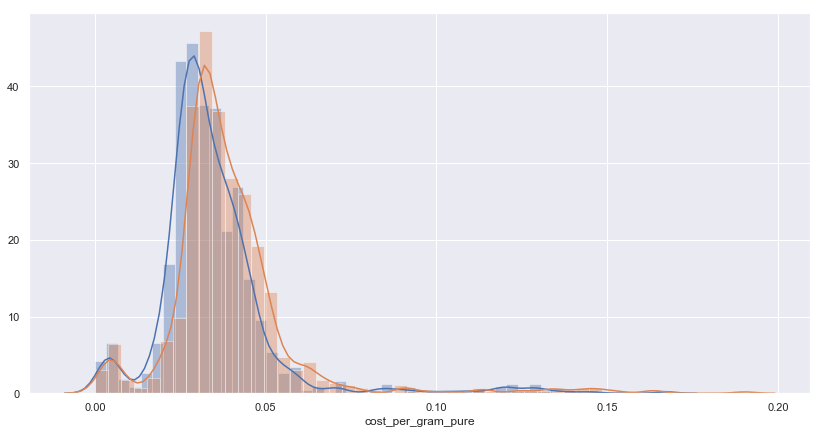

In [69]:
plt.figure(figsize=(14, 7))
sns.distplot (coca_datos['cost_per_gram'])
sns.distplot (coca_datos['cost_per_gram_pure'])


### Formando el primer modelo de regresion con una variable

El costo de la cocaina  por gramo deberia estar relacionada con el costo por gramo puro
ya que de la pura como explicaba en la variable calidad se extrae la cocaina cortada, entonces podriamos tratar de predecir el precio de la coca en funcion de la cocaina pura.

es decir entre mayor sea el costo por gramo (puro), mayor deberia ser el costo por gramo cortado

In [123]:
lm = smf.ols ( formula = "cost_per_gram ~ cost_per_gram_pure", data = coca_datos).fit()


In [124]:
lm.params

Intercept             0.000384
cost_per_gram_pure    0.873876
dtype: float64

el modelo lineal predictivo seria

costo = 0.020108+0.711129*cost_per_gram_pure



In [125]:
lm.pvalues

Intercept             0.081873
cost_per_gram_pure    0.000000
dtype: float64

In [126]:
lm.rsquared

0.9752951094132059

In [127]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 3.067e+04
Date:                Wed, 11 Dec 2019   Prob (F-statistic):               0.00
Time:                        00:50:20   Log-Likelihood:                 3465.8
No. Observations:                 779   AIC:                            -6928.
Df Residuals:                     777   BIC:                            -6918.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0004      0.000      1.742      0.082   -4.87e-05       0.001
cost_per_gram_pure     0.8739      0.005    175.141      0.000       0.864       0.884
==============================================================================
Omnibus:                      565.457   Durbin-Watson:                   1.766
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14555.703
Skew:                          -2.951   Prob(JB):                         0.00
Kurtosis:                      23.337   Cond. No.                         49.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [128]:
coca_pred=lm.predict(pd.DataFrame(coca_datos["cost_per_gram_pure"]))


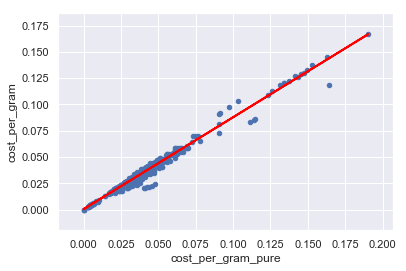

In [129]:
coca_datos.plot(kind="scatter",x="cost_per_gram_pure", y="cost_per_gram")
plt.plot(pd.DataFrame(coca_datos["cost_per_gram_pure"]),coca_pred, c="red", linewidth=2)



In [130]:
coca_datos["coca_pred"]= 0.010598+ 0.778261*coca_datos["cost_per_gram_pure"]
coca_datos["RSE"]=(coca_datos["cost_per_gram"] - coca_datos["coca_pred"])**2


In [131]:
SSD = sum (coca_datos["RSE"])
SSD

0.04172664774427634

In [91]:
RSE = np.sqrt (SSD/(len(coca_datos)-2))
RSE

0.007328181858355659

In [132]:
cpgmean = np.mean(coca_datos["cost_per_gram"])
cpgmean

0.03465831174311031

In [133]:
error = RSE/cpgmean
error


0.2114408201032014

(array([  6.,   1.,  11.,  76., 417., 232.,  16.,   7.,   8.,   5.]),
 array([-0.02398235, -0.02035114, -0.01671992, -0.0130887 , -0.00945749,
        -0.00582627, -0.00219505,  0.00143616,  0.00506738,  0.0086986 ,
         0.01232981]),
 <a list of 10 Patch objects>)

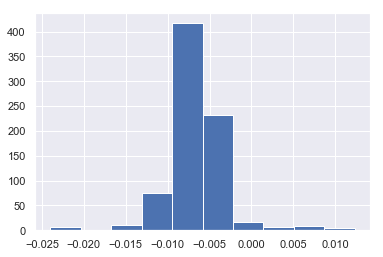

In [134]:
plt.hist((coca_datos["cost_per_gram"] - coca_datos["coca_pred"]))

### Segundo modelo de regresión simple

In [135]:
lm2 = smf.ols ( formula = "btc_price ~ grams", data = coca_datos).fit()


In [136]:
lm2.params

Intercept    0.015072
grams        0.024246
dtype: float64

In [137]:
lm2.params

Intercept    0.015072
grams        0.024246
dtype: float64

In [138]:
lm2.rsquared

0.5038416494531673

In [139]:
coca_pred2=lm2.predict(pd.DataFrame(coca_datos["grams"]))


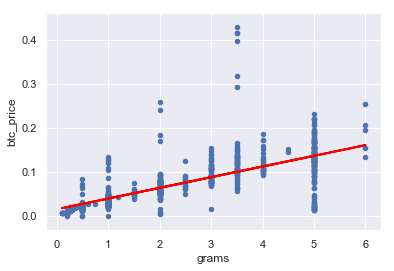

In [140]:
coca_datos.plot(kind="scatter",x="grams", y="btc_price")
plt.plot(pd.DataFrame(coca_datos["grams"]),coca_pred2, c="red", linewidth=2)

# regresion multiple 
* Precio de la coca normal en funcion de la calidad y costo por gram puro 

In [167]:
import plotly.express as px

fig = px.scatter_3d(coca_datos, x='cost_per_gram', y='cost_per_gram_pure', z='rating',
              color='cost_per_gram', size='cost_per_gram', size_max=18,
              symbol='cost_per_gram', opacity=0.7)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [263]:
lm3 = smf.ols(formula = "cost_per_gram ~ grams + btc_price + quality", data=coca_datos).fit()

In [264]:
lm3.params

Intercept    0.025896
grams       -0.011094
btc_price    0.316283
quality      0.000137
dtype: float64

In [265]:
lm3.pvalues

Intercept     1.231350e-05
grams        2.599962e-146
btc_price    3.974757e-141
quality       3.812757e-02
dtype: float64

In [266]:
lm3.rsquared

0.6118411240031545

In [268]:
coca_preds3=lm3.predict(coca_datos[["grams","btc_price","quality"]])

In [147]:
coca_preds3

0       0.026010
1       0.025990
2       0.032985
3       0.041089
4       0.033929
6       0.031055
7       0.029559
8       0.028221
9       0.022095
10      0.017310
12      0.032779
13      0.015239
15      0.031412
16      0.013267
17      0.030067
18      0.015379
20      0.028927
25      0.028476
27      0.026000
29      0.020298
31      0.019551
34      0.021778
35      0.021778
36      0.021778
37      0.021311
39      0.004127
42      0.046601
43      0.041337
46      0.044021
47      0.039995
          ...   
1453    0.033546
1454    0.031025
1456    0.031011
1457    0.033817
1458    0.033546
1461    0.033546
1462    0.032701
1466    0.036007
1467    0.030803
1468    0.028180
1469    0.027100
1470    0.026123
1472    0.030803
1473    0.051134
1475    0.038518
1476    0.041053
1477    0.033039
1478    0.023154
1479    0.030196
1481    0.020898
1482    0.029757
1483    0.036031
1485    0.020083
1486    0.029090
1487    0.034730
1489    0.019218
1490    0.028384
1491    0.0284

In [269]:
SSD= sum((coca_datos["cost_per_gram"]-coca_preds3)**2)

In [270]:
SSD

0.09793391979904302

In [271]:
RSE = np.sqrt(SSD/(len(coca_datos)-2-1))

In [272]:
RSE

0.011234033331607753

In [273]:
error2=RSE/cpgmean

In [274]:
error2

0.3241367731606533

In [275]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     407.2
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          9.59e-159
Time:                        01:51:46   Log-Likelihood:                 2392.9
No. Observations:                 779   AIC:                            -4778.
Df Residuals:                     775   BIC:                            -4759.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0259      0.006      4.400      0.000       0.014       0.037
grams         -0.0111      0.000    -32.408      0.000      -0.012      -0.010
btc_price      0.3163      0.010     31.543      0.000       0.297       0.336
quality        0.0001    6.6e-05      2.077      0.038    7.53e-06       0.000
==============================================================================
Omnibus:                      702.920   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25217.882
Skew:                           4.000   Prob(JB):                         0.00
Kurtosis:                      29.700   Cond. No.                     2.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  validación del modelo 

(array([  3.,  18.,  49., 129., 185., 186., 142.,  51.,   9.,   7.]),
 array([-3.40502356, -2.73614081, -2.06725807, -1.39837532, -0.72949258,
        -0.06060983,  0.60827291,  1.27715566,  1.9460384 ,  2.61492115,
         3.28380389]),
 <a list of 10 Patch objects>)

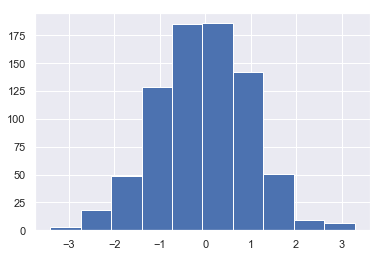

In [276]:
a = np.random.randn(len(coca_datos))#distribución uniforme con el mismo numero de elementos de mi dataset
plt.hist(a)

In [278]:
check = (a<0.8)
training =coca_datos[check]#conjunto de entrenamiento 80%
testing =coca_datos[~check]#conjunto de testing 20%

In [279]:
lm4= smf.ols(formula ="cost_per_gram ~ grams+btc_price+quality", data=training).fit()

In [280]:
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          cost_per_gram   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     313.6
Date:                Wed, 11 Dec 2019   Prob (F-statistic):          8.04e-124
Time:                        01:52:07   Log-Likelihood:                 1907.6
No. Observations:                 624   AIC:                            -3807.
Df Residuals:                     620   BIC:                            -3789.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0252      0.007      3.873      0.000       0.012       0.038
grams         -0.0111      0.000    -28.633      0.000      -0.012      -0.010
btc_price      0.3144      0.011     27.395      0.000       0.292       0.337
quality        0.0001    7.3e-05      2.026      0.043    4.51e-06       0.000
==============================================================================
Omnibus:                      593.054   Durbin-Watson:                   1.504
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23114.137
Skew:                           4.223   Prob(JB):                         0.00
Kurtosis:                      31.595   Cond. No.                     2.23e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.23e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### validación con el conjunto de testing 

In [281]:
c_pred = lm.predict(testing)
c_pred

4       0.034001
6       0.031086
8       0.028211
9       0.022270
20      0.029199
31      0.020256
34      0.021518
43      0.041560
47      0.040198
58      0.004738
61      0.004241
62      0.006183
65      0.002966
74      0.003626
76     -0.004169
82      0.041159
87      0.051877
91      0.044916
92      0.053914
94      0.055973
101     0.030994
104     0.030934
105     0.038133
106     0.044521
110     0.046554
116     0.046743
122     0.000429
124     0.031678
127     0.037105
137     0.030994
          ...   
1227    0.052622
1228    0.067313
1229    0.045488
1241    0.025486
1275    0.029965
1280    0.026609
1298    0.006227
1301    0.046762
1302    0.046276
1315    0.025095
1322    0.002965
1323    0.060108
1326   -0.000379
1356    0.035226
1360    0.027612
1367    0.035325
1383    0.029055
1391    0.019803
1417    0.031142
1423    0.032429
1427    0.030994
1434    0.031127
1441    0.031108
1461    0.033545
1462    0.032688
1470    0.026084
1481    0.021169
1483    0.0360

In [282]:
SSD = sum ((testing["cost_per_gram"]-c_pred)**2)
SSD

8.729387483479287e-05

In [283]:
RSE = np.sqrt(SSD/(len(testing)-2-1))
RSE

0.0007578270304783521

In [284]:
cpgmm=np.mean(testing["cost_per_gram"])
error = RSE/cpgmm
error #diferencia con respecto al otro modelo 

0.02216494571241072

# regresion con scikit learn

In [290]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
feature_cols = ["cost_per_gram_pure","rating","btc_price","quality","successful_transactions","grams"]

In [291]:
x=coca_datos[feature_cols]
y=coca_datos["cost_per_gram"]

In [292]:
estimator = SVR (kernel ="linear") #indicamos que deseamos un modelo lineal
selector = RFE (estimator,2,step=1)
selector = selector.fit (x,y)#crea el modelo con las variables especificadas en la celda anterior

In [293]:
selector.support_

array([False, False, False, False,  True,  True])

In [294]:
selector.ranking_

array([5, 4, 3, 2, 1, 1])

In [298]:
from sklearn.linear_model import LinearRegression

In [296]:
x_pred = x[["grams","successful_transactions"]]

In [299]:
lm5= LinearRegression()
lm5.fit(x_pred,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [301]:
lm5.intercept_

0.04197098757483923

In [302]:
lm5.coef_

array([-3.39620690e-03,  2.13540575e-06])

In [304]:
lm5.score(x_pred,y)

0.10636335024068078

In [306]:
feature_cols2 = ["cost_per_gram_pure","rating","btc_price","quality","successful_transactions","grams"]

In [307]:
x2=coca_datos[feature_cols2]
y2=coca_datos["cost_per_gram"]

In [308]:
estimator = SVR (kernel ="linear") #indicamos que deseamos un modelo lineal
selector = RFE (estimator,2,step=1)
selector = selector.fit (x,y)#crea el modelo con las variables especificadas en la celda anterior

In [309]:
x_pred2 = x2[["cost_per_gram_pure"]]

In [310]:
lm6= LinearRegression()
lm6.fit(x_pred2,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [312]:
lm6.score(x_pred2,y) #valor de rsquared

0.9752951094132059

# clustering 

(array([128., 198.,  11., 116.,  75.,  68.,  24.,   2., 152.,   5.]),
 array([0.1 , 0.69, 1.28, 1.87, 2.46, 3.05, 3.64, 4.23, 4.82, 5.41, 6.  ]),
 <a list of 10 Patch objects>)

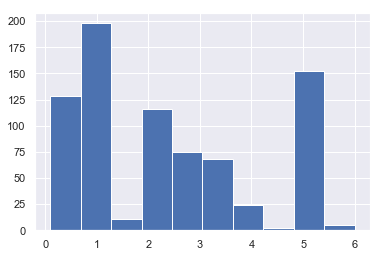

In [364]:
plt.hist(clustcoca["grams"])

In [366]:
clustcoca.shape

(779, 8)

In [369]:
from sklearn.cluster import AgglomerativeClustering

In [392]:
clust=AgglomerativeClustering(n_clusters=8, linkage="ward").fit(clustcoca) # creamos 6 clusters

In [393]:
md=pd.Series(clust.labels_)#obtencion de las etiquetas 

Text(0, 0.5, 'freq. de coca cluster')

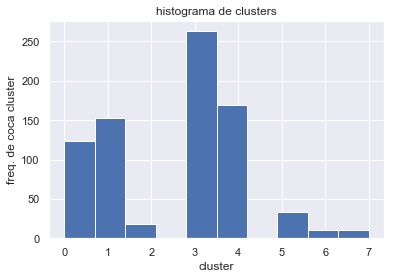

In [394]:
plt.hist(md)
plt.title("histograma de clusters")
plt.xlabel("cluster")
plt.ylabel ("freq. de coca cluster")

In [347]:
clust.children_

array([[ 195,  196],
       [  34,   35],
       [ 294,  295],
       ...,
       [1416, 1551],
       [1552, 1553],
       [1554, 1555]], dtype=int64)

In [395]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [396]:
z=linkage(clustcoca, "ward")

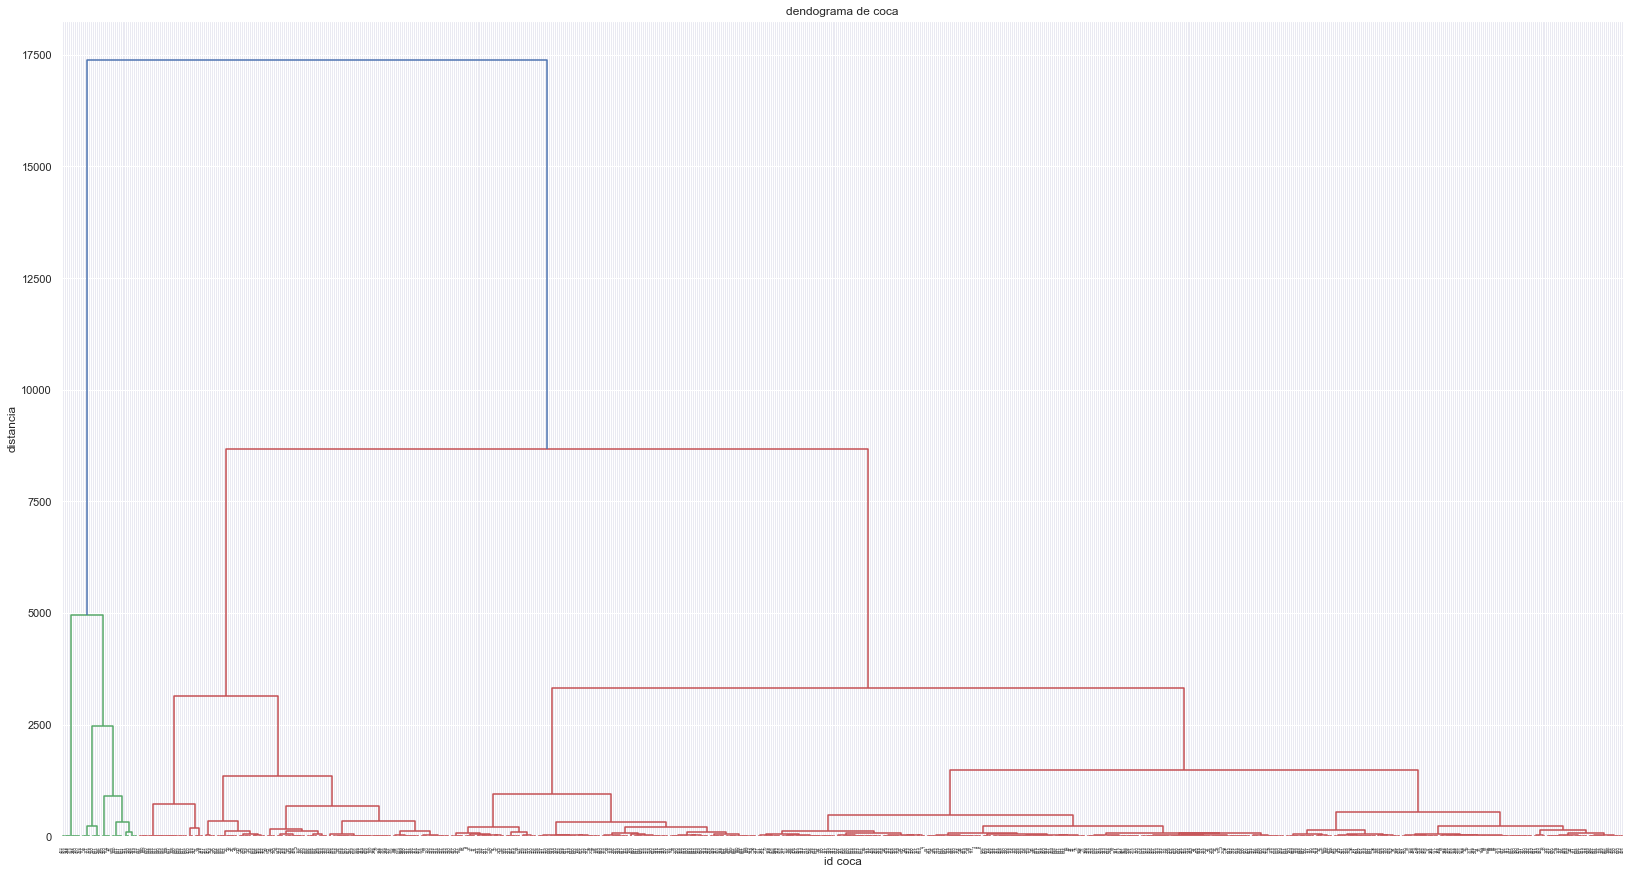

In [399]:
plt.figure (figsize = (28,15))
plt.title("dendograma de coca")
plt.xlabel("id coca")
plt.ylabel("distancia")
dendrogram(z, leaf_rotation=90.,leaf_font_size=4.)
plt.show()

In [400]:
from sklearn.cluster import KMeans
from sklearn import datasets


In [401]:
model =KMeans (n_clusters=8)
model.fit (clustcoca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [402]:
model.labels_

array([3, 3, 4, 3, 3, 3, 3, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 3, 3, 3,
       3, 3, 3, 4, 4, 4, 4, 4, 4, 0, 3, 2, 3, 3, 0, 3, 3, 3, 3, 3, 4, 4,
       3, 3, 3, 3, 3, 4, 7, 4, 4, 3, 7, 7, 4, 4, 7, 7, 3, 7, 0, 3, 3, 3,
       1, 6, 3, 3, 3, 2, 3, 3, 3, 6, 3, 3, 3, 4, 7, 3, 3, 2, 0, 3, 3, 3,
       3, 3, 0, 0, 3, 3, 0, 0, 0, 0, 3, 0, 0, 3, 3, 3, 3, 4, 3, 3, 3, 3,
       7, 1, 3, 0, 6, 0, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 4, 0, 0, 0, 0, 0,
       3, 3, 3, 4, 7, 5, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 5, 6, 1, 3, 3, 6,
       3, 3, 7, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 0, 3, 0, 3, 0, 4, 3, 3,
       7, 1, 0, 4, 7, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0, 7, 2, 0, 4, 4, 3,
       0, 3, 4, 3, 0, 0, 4, 3, 3, 7, 3, 3, 2, 7, 3, 3, 0, 0, 3, 3, 3, 4,
       7, 7, 7, 3, 4, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 4, 3, 3, 0, 0, 2,
       0, 7, 0, 0, 3, 3, 3, 0, 6, 2, 0, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       3, 3, 0, 3, 3, 0, 0, 7, 7, 4, 3, 3, 4, 7, 5, 3, 3, 0, 3, 3, 5, 6,
       1, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 7, 0, 3,

In [403]:
md_k = pd.Series (model.labels_)

In [405]:
clustcoca2=clustcoca
clustcoca2["clust_her"]=md
clustcoca2["clust_k"]=md_k

(array([181.,  10.,  39.,   0., 361.,  86.,   0.,  10.,  18.,  74.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

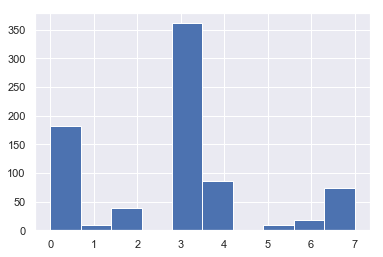

In [406]:
plt.hist(md_k)


In [408]:
clustcoca2.head(100)

grams  quality  btc_price  cost_per_gram  cost_per_gram_pure  escrow  \
0     1.00    90.00    0.02577       0.025770            0.028633       1   
1     2.00    90.00    0.05150       0.025750            0.028611       1   
2     0.50    89.00    0.01649       0.032980            0.037056       1   
3     1.00    89.00    0.04120       0.041200            0.046292       1   
4     1.00    87.00    0.03400       0.034000            0.039080       1   
6     2.00    87.00    0.06230       0.031150            0.035805       0   
7     3.00    87.00    0.08900       0.029667            0.034100       0   
8     5.00    87.00    0.14170       0.028340            0.032575       0   
9     0.50    75.00    0.01173       0.023460            0.031280       1   
10    1.00    75.00    0.01937       0.019370            0.025827       1   
12    1.00    95.00    0.03228       0.032280            0.033979       1   
13    2.00    75.00    0.03520       0.017600            0.023467       1   
15    2.00    95.00    0.06160       0.030800            0.032421       1   
16    3.50    75.00    0.05570       0.015914            0.021219       1   
17    3.50    95.00    0.10270       0.029343            0.030887       1   
18    5.00    75.00    0.08860       0.017720            0.023627       1   
20    0.20    75.00    0.00586       0.029300            0.039067       1   
25    1.00    90.00    0.02830       0.028300            0.031444       1   
27    5.00    90.00    0.12880       0.025760            0.028622       1   
29    1.00    50.00    0.02054       0.020540            0.041080       1   
31    3.50    50.00    0.07040       0.020114            0.040229       0   
34    1.00    94.00    0.02060       0.020600            0.021915       1   
35    2.00    94.00    0.04120       0.020600            0.021915       1   
36    3.50    94.00    0.07210       0.020600            0.021915       1   
37    5.00    94.00    0.10050       0.020100            0.021383       1   
39    5.00    85.00    0.02577       0.005154            0.006064       1   
42    1.00    85.00    0.04630       0.046300            0.054471       1   
43    1.00    85.00    0.04120       0.041200            0.048471       0   
46    2.00    85.00    0.08760       0.043800            0.051529       1   
47    2.00    85.00    0.07980       0.039900            0.046941       0   
..     ...      ...        ...            ...                 ...     ...   
90    0.20    78.00    0.00814       0.040700            0.052179       1   
91    0.30    90.00    0.01350       0.045000            0.050000       1   
92    0.35    85.00    0.01855       0.053000            0.062353       1   
93    0.30    87.00    0.01546       0.051533            0.059234       1   
94    0.30    85.00    0.01649       0.054967            0.064667       1   
95    0.30    95.00    0.01584       0.052800            0.055579       1   
96    0.45    85.00    0.02370       0.052667            0.061961       1   
97    0.40    85.00    0.02110       0.052750            0.062059       1   
98    0.50    81.88    0.02730       0.054600            0.066683       0   
99    0.50    88.00    0.03190       0.063800            0.072500       1   
100   0.50    90.00    0.01623       0.032460            0.036067       1   
101   0.50    90.00    0.01546       0.030920            0.034356       1   
102   0.50    91.00    0.02010       0.040200            0.044176       0   
103   0.50    90.00    0.02054       0.041080            0.045644       1   
104   0.50    90.00    0.01543       0.030860            0.034289       1   
105   0.50    90.00    0.01907       0.038140            0.042378       0   
106   0.50    90.00    0.02230       0.044600            0.049556       1   
107   0.50    90.00    0.02230       0.044600            0.049556       1   
108   0.50    90.00    0.02230       0.044600            0.049556       1   
109   0.50    90.00    0.02230       0.044600            0.049556       1   
1

# interpretacion 

In [ ]:
clustcoca2.groupby("clust_k").mean()